# Harmonic filtering performance

In [1]:
import numpy as np
# %matplotlib widget
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rcParams.update({"text.usetex": True, "font.family": "Helvetica"})
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['lines.linewidth'] = 2.0

# Set global font sizes
mpl.rcParams['axes.labelsize'] = 24         # x/y label size
mpl.rcParams['axes.titlesize'] = 18         # subplot title size
mpl.rcParams['xtick.labelsize'] = 18        # tick labels
mpl.rcParams['ytick.labelsize'] = 18
mpl.rcParams['legend.fontsize'] = 20        # legend text
mpl.rcParams['figure.titlesize'] = 20       # optional for fig.suptitle()
import pickle as pl
import healpy as hp
from tqdm import tqdm
from astropy.io import ascii

# CHANGE THIS PATH IN ORDER TO MATCH THE PATH OF YOUR PACKAGE
PATH_PACKAGE = '/home/miguel/Desktop/PlanckBIRD-lens'

In [2]:
Nsim = 400
Nsim_MF = 100
lmax_LB = 1000
lmax_P = 2048
L_LB = np.arange(lmax_LB + 1)
factor_L_LB = (L_LB*(L_LB+1))**2/(2*np.pi)
L_P = np.arange(lmax_P + 1)
factor_L_P = (L_P*(L_P+1))**2/(2*np.pi)
qe_list = ['TT', 'TE', 'EE', 'TB', 'EB']
qe_list_MV = qe_list + ['MV']
auto_spectra_qe = [x + y for x, y in zip(qe_list_MV, qe_list_MV)]
noise_pairs = ['TTTT', 'TTTE', 'TTEE', 'TETE', 'TEEE', 'EEEE', 'TBTB', 'TBEB', 'EBEB']
noise_pairs_2 = ['TTTE', 'TTEE', 'TEEE', 'TBEB']

pairs = []
for i in range(len(qe_list)):
    for j in range(i, len(qe_list)):
        pairs.append(qe_list[i] + qe_list[j])
pairs_no_MV = list(pairs)
pairs.append('MVMV')
# Values of fsky, w2 and w4 for Planck's 80 % mask with an apodization scale of 2 degrees.
fsky = 0.7990690867106119
w2_LB = 0.7782862278400908
w4_LB = 0.7752966348731124
w2_P = 0.6788767002202918
w4_P = 0.6758500017222131

In [3]:
fd_filt = f'{PATH_PACKAGE}/data/mean_spectra_filtered'
fd_HILC = f'{PATH_PACKAGE}/data/mean_spectra_HILC'
mean_filtered_full_sky = pl.load(open(f"{fd_HILC}/mean_signal_noise_LiteBIRD_no_fg_chance_False_mask_False_400.pkl",'rb'))
mean_cls_filtered = pl.load(open(f"{fd_filt}/mean_cls_wiener_filtered_TEB_no_fg_LiteBIRD_fsky_0.8.pkl",'rb'))

/tmp/ipykernel_15335/3737679104.py:49: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


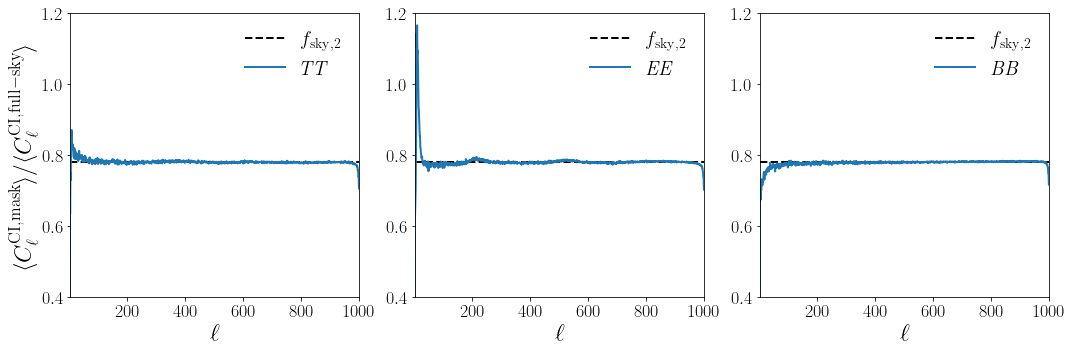

In [4]:
# Low complexity
fg_index = 1
directory_plots = f"{PATH_PACKAGE}/notebooks/plots"

fig, axes = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)  # Three columns

# First subplot
ax = axes[0]
ax.axhline(y=w2_LB, linestyle='dashed', c='k', label='$f_{\mathrm{sky},2}$')
ax.plot(mean_filtered_full_sky[0]*mean_cls_filtered[0], label='\\textit{TT}')
ax.set_xlim([2, lmax_LB])
ax.set_ylim([0.4, 1.2])
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$\langle C_\ell^{\rm CI, mask}\rangle /\langle C_\ell^{\rm CI, full-sky}\rangle$')
ax.tick_params(axis='both', which='major')
ax.tick_params(axis='both', which='minor')
ax.set_xscale('linear')
# ax.set_yscale('log')
ax.legend(ncol=1, loc='upper right', frameon=False)
# ax.set_title("Planck Low complexity", size=22)

# Second subplot
ax = axes[1]
ax.axhline(y=w2_LB, linestyle='dashed', c='k', label='$f_{\mathrm{sky},2}$')
ax.plot(mean_filtered_full_sky[1]*mean_cls_filtered[1], label='\\textit{EE}')
ax.set_xlim([2, lmax_LB])
ax.set_ylim([0.4, 1.2])
ax.set_xlabel(r'$\ell$')
ax.tick_params(axis='both', which='major')
ax.tick_params(axis='both', which='minor')
ax.set_xscale('linear')
ax.set_yscale('linear')
ax.legend(ncol=1, loc='upper right', frameon=False)
# ax.set_title("LiteBIRD No foregrounds", size=22)

# Third subplot
ax = axes[2]
ax.axhline(y=w2_LB, linestyle='dashed', c='k', label='$f_{\mathrm{sky},2}$')
ax.plot(mean_filtered_full_sky[2]*mean_cls_filtered[2], label='\\textit{BB}')
ax.set_xlim([2, lmax_LB])
ax.set_ylim([0.4, 1.2])
ax.set_xlabel(r'$\ell$')
ax.tick_params(axis='both', which='major')
ax.tick_params(axis='both', which='minor')
ax.set_xscale('linear')
ax.set_yscale('linear')
ax.legend(ncol=1, loc='upper right', frameon=False)
# ax.set_title("Planck + LiteBIRD No foregrounds", size=22)
plt.tight_layout()
plt.savefig(f'{directory_plots}/Harmonic_filtering_LiteBIRD_no_fg.pdf')